# Quantifying Price Movements 
#### Market vs. Currency

Part of predicting the prices of cryptocurrencies is determining how much value to place on the technical analysis of the 
cryptocurrency itself an how much value to place on analysis of the market.

When cryptocurrencies are moving as a result of a bullish or bearish market, they tend to be moving in the same direction and at a similar pace. This means that if most of the cryptocurrencies are moving similarly, it is more likely that this movement is related to the market more than it is the investment potential (or FOMO, FUD or whatever other reason people have for buying or selling) of the individual cryptocurrency. 
So, we look for a way to quantify the similarities/differences in the movements of cryptocurrencies. It seems like calculating the variance is an intuitive way of determining how similar price movements are.

- Get the daily percent change in the close price for each currency (30day average?)
- Get the variance for each day (across all currencies)
- If the variance is lower than the "general variance" then the currencies are moving more with the market.
- If the variance is higher than the "general variance" then the currencies are moving more independently.


In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [25]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
all_currencies_df = pd.read_csv('../input/all_currencies.csv', parse_dates=['Date'], date_parser=dateparse)

In [26]:
all_currencies_df.sample(5)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
352147,467,2015-06-09,MZC,0.000148,0.000156,0.000148,0.000153,1033.0,108285.0
614313,1343,2017-12-25,XWC,0.229694,0.275367,0.218154,0.242281,1257310.0,57098500.0
235876,415,2016-08-04,GAM,0.259130,0.264490,0.185439,0.250994,2193.0,407913.0
256054,190,2014-12-30,GRE,0.000009,0.000009,0.000009,0.000009,22.0,5078.0
284970,718,2017-09-07,INFX,0.554370,0.611733,0.515030,0.536285,106537.0,927674.0


In [27]:
# Get rank by marketcap
last_date = max(all_currencies_df.Date)
last_date_currencies_df = all_currencies_df[all_currencies_df['Date'] == last_date]

last_date_currencies_df['rank'] = last_date_currencies_df['Market Cap'].rank(method='dense', ascending=False)

all_currencies_df = pd.merge(left=all_currencies_df,right=last_date_currencies_df[['Symbol', 'rank']], how='left', left_on='Symbol', right_on='Symbol')


In [28]:
# Initially we will just work with the top 50 cryptos with data starting from 2017 to speed things up
top50_currencies_df = all_currencies_df[all_currencies_df['rank'] <= 50]
#top50_currencies_df = top50_currencies_df[(top50_currencies_df['Date'] >= '2017-01-01')]

# Reshape the dataframe to multiindex by Date and currency
top50_currencies_df.set_index(['Symbol', 'Date'], inplace=True) # Or should it be the other way around?
top50_currencies_df.head()

Unnamed: 0      Open      High       Low     Close  \
Symbol Date                                                             
ACT    2017-08-27           0  0.237717  0.243946  0.235746  0.243735   
       2017-08-28           1  0.246066  0.249519  0.203228  0.228876   
       2017-08-29           2  0.227651  0.244346  0.209235  0.211962   
       2017-08-30           3  0.210644  0.224400  0.161109  0.168399   
       2017-08-31           4  0.170501  0.206064  0.154846  0.187079   

                      Volume  Market Cap  rank  
Symbol Date                                     
ACT    2017-08-27  4030040.0         NaN  48.0  
       2017-08-28  9831220.0         NaN  48.0  
       2017-08-29  4047160.0         NaN  48.0  
       2017-08-30  4780670.0         NaN  48.0  
       2017-08-31  7795120.0         NaN  48.0

In [29]:
# Get daily percent change in close price
top50_currencies_df['pct_change'] = top50_currencies_df['Close'].groupby(level=0).pct_change()
top50_currencies_df.head()

Unnamed: 0      Open      High       Low     Close  \
Symbol Date                                                             
ACT    2017-08-27           0  0.237717  0.243946  0.235746  0.243735   
       2017-08-28           1  0.246066  0.249519  0.203228  0.228876   
       2017-08-29           2  0.227651  0.244346  0.209235  0.211962   
       2017-08-30           3  0.210644  0.224400  0.161109  0.168399   
       2017-08-31           4  0.170501  0.206064  0.154846  0.187079   

                      Volume  Market Cap  rank  pct_change  
Symbol Date                                                 
ACT    2017-08-27  4030040.0         NaN  48.0         NaN  
       2017-08-28  9831220.0         NaN  48.0   -0.060964  
       2017-08-29  4047160.0         NaN  48.0   -0.073900  
       2017-08-30  4780670.0         NaN  48.0   -0.205523  
       2017-08-31  7795120.0         NaN  48.0    0.110927

In [30]:
# Plot daily percentage change for BTC
btc_df = top50_currencies_df.xs('BTC')
btc_df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,rank,pct_change
Date,,,,,,,,,
2013-04-28,0,135.30,135.98,132.10,134.21,NaN,1.500520e+09,1.0,NaN
2013-04-29,1,134.44,147.49,134.00,144.54,NaN,1.491160e+09,1.0,0.076969
2013-04-30,2,144.00,146.93,134.05,139.00,NaN,1.597780e+09,1.0,-0.038328
2013-05-01,3,139.00,139.89,107.72,116.99,NaN,1.542820e+09,1.0,-0.158345
2013-05-02,4,116.38,125.60,92.28,105.21,NaN,1.292190e+09,1.0,-0.100692


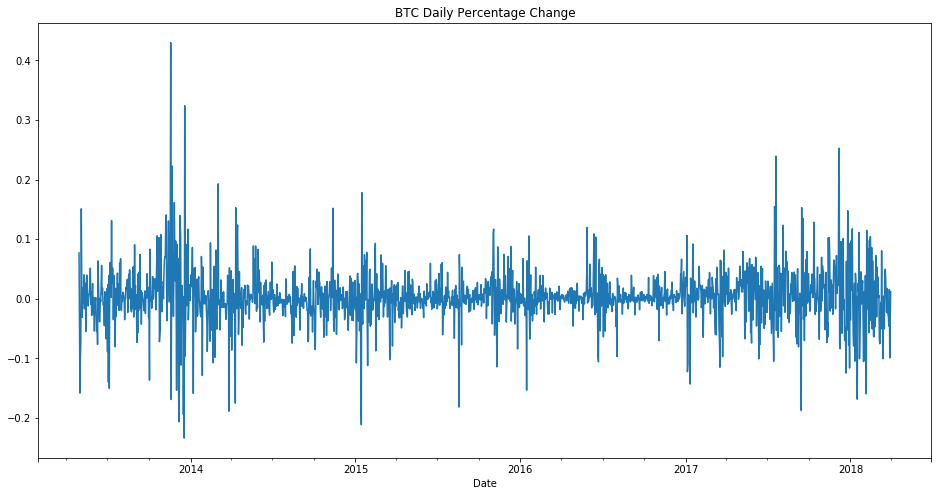

In [31]:
btc_df['pct_change'].plot(figsize=(16,8), title='BTC Daily Percentage Change')

Another way to get an easy comparison of how any particular currency is moving relative to the market is to build an index to compare it to. An index will also be able to show trends and changes in investing patterns much better than looking at Bitcoin or a handfull of other currencies on their own, which up until recently might have been fine given Bitcoin's dominance.
 
We can calculate a crypto index, lets make it crypto50, using weighted average market capitalisation (following the S&P 500 method).
- Get top 50 currencies by marketcap
- For each row (day, currency) calculate the market weight -> #outstanding units * price / (total market cap)
- Calculate an index divisor -> eg: divisor = total market cap / 100 would give us a 100 point starting index 

In [41]:
top50_currencies_df = all_currencies_df[all_currencies_df['rank'] <= 30]
top50_start_dates = top50_currencies_df.loc[top50_currencies_df.groupby('Symbol')['Date'].idxmin()]
start_date = max(top50_start_dates.Date)

In [42]:
start_date

Timestamp('2017-10-23 00:00:00')

In [43]:
top50_start_dates

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap,rank
15099,0,2017-10-01,ADA,0.021678,0.032226,0.017354,0.024969,50068700.0,NaN,6.0
48327,0,2017-07-23,BCH,555.890000,578.970000,411.780000,413.060000,85013.0,NaN,4.0
84538,0,2013-04-28,BTC,135.300000,135.980000,132.100000,134.210000,NaN,1.500520e+09,1.0
90216,0,2017-10-23,BTG,479.820000,539.720000,479.820000,500.130000,7652060.0,NaN,16.0
147278,0,2014-02-14,DASH,0.213899,0.378883,0.213899,0.374024,15422.0,7.025370e+05,11.0
199372,0,2016-07-24,ETC,0.752345,0.959354,0.737342,0.928814,17769300.0,NaN,13.0
199988,0,2015-08-07,ETH,2.830000,3.540000,2.520000,2.770000,164329.0,NaN,2.0
315609,0,2016-04-06,LSK,2.040000,3.770000,1.450000,3.770000,222502.0,NaN,15.0
317687,0,2013-04-28,LTC,4.300000,4.400000,4.180000,4.350000,NaN,7.377340e+07,5.0
335656,0,2017-06-13,MIOTA,0.638503,0.652862,0.533910,0.590255,25425600.0,1.774740e+09,9.0


In [ ]:
# Lets start this index at the earliest date when the top 50 cryptos all existed
top50_start_dates = top50_currencies_df.loc[top50_currencies_df.groupby('Symbol')['Date'].idxmin()]

start_date = min(top50_currencies_df.Date)

crypto50_index_divisor = 